In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
house_price = pd.read_csv("Data/housing_iter_0-2/housing-classification-iter-0-2.csv")
house_price

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive
0,8450,65.0,856,3,0,0,2,0,0,0
1,9600,80.0,1262,3,1,0,2,298,0,0
2,11250,68.0,920,3,1,0,2,0,0,0
3,9550,60.0,756,3,1,0,3,0,0,0
4,14260,84.0,1145,4,1,0,3,192,0,0
...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0
1456,13175,85.0,1542,3,2,0,2,349,0,0
1457,9042,66.0,1152,4,2,0,1,0,0,1
1458,9717,68.0,1078,2,0,0,1,366,0,0


In [3]:
y = house_price.pop("Expensive")

In [4]:
X = house_price.copy()

In [5]:
# split the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [6]:
# missing values in the dataset need to be taken care of before a decision tree model can be fitted
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 133 to 792
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotArea       1168 non-null   int64  
 1   LotFrontage   968 non-null    float64
 2   TotalBsmtSF   1168 non-null   int64  
 3   BedroomAbvGr  1168 non-null   int64  
 4   Fireplaces    1168 non-null   int64  
 5   PoolArea      1168 non-null   int64  
 6   GarageCars    1168 non-null   int64  
 7   WoodDeckSF    1168 non-null   int64  
 8   ScreenPorch   1168 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 91.2 KB


In [7]:
# use a simple imputer to impute the missing values, only impute the training dataset
imputer = SimpleImputer()
imputer.fit(X_train)
X_train_imputed = imputer.transform(X_train)

In [8]:
# fit the decision tree model to the training dataset
dtree = DecisionTreeClassifier()
dtree.fit(X = X_train_imputed, y = y_train)

DecisionTreeClassifier()

In [9]:
# make predictions on the training dataset
y_train_pred = dtree.predict(X_train_imputed)

In [10]:
# compare it with the actual y train to see how accurate the prediction is
accuracy_score(y_true = y_train, y_pred = y_train_pred)

1.0

In [11]:
# impute the missing values in the testing dataset
X_test_imputed = imputer.transform(X_test)

In [12]:
# make predictions on the testing dataset
y_test_pred = dtree.predict(X_test_imputed)

In [13]:
# check how accurate the prediction is by comparing the y testing set with the y predictions
accuracy_score(y_true = y_test, y_pred = y_test_pred)

0.8835616438356164

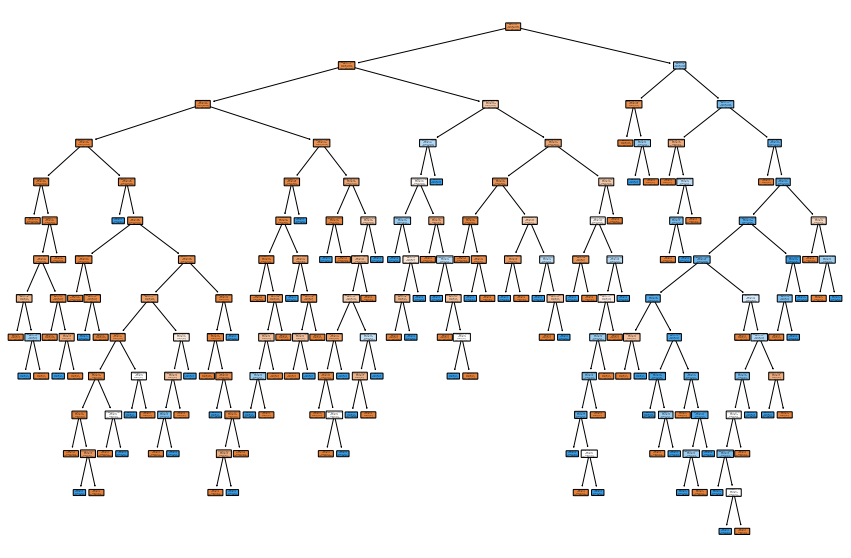

In [17]:
plt.figure(figsize = (15, 10))
plot_tree(dtree, filled = True, rounded = True, class_names = ["Not Expensive", "Expensive"], 
          feature_names = X.columns);

In [310]:
# the decision tree is too complex, the model is overfitted, the tree needs to be pruned
dtree2 = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 10)
dtree2.fit(X = X_train_imputed, y = y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=10)

In [311]:
y_train_pred2 = dtree2.predict(X_train_imputed)

In [312]:
accuracy_score(y_true = y_train, y_pred = y_train_pred2)

0.9092465753424658

In [313]:
y_test_pred2 = dtree2.predict(X_test_imputed)

In [314]:
accuracy_score(y_true = y_test, y_pred = y_test_pred2)

0.9383561643835616

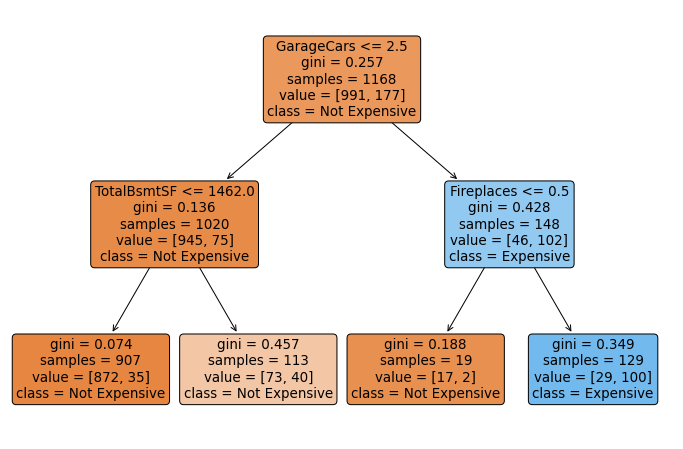

In [316]:
plt.figure(figsize = (12, 8))
plot_tree(dtree2, filled = True, rounded = True, class_names = ["Not Expensive", "Expensive"], 
          feature_names = X.columns);